# Bank Churn Classification

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

source: https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/nikau/OneDrive/Desktop/IOD/DataSets/BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [5]:
df.shape

(10127, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

there are two columns that do not provide any information so I am going to remove these

In [7]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace = True)

In [8]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

there are no null values present in there dataset therefore is clean and ready to use

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Exploratory Data Analysis (EDA)

In [10]:
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

CLIENTNUM : [768805383 818770008 713982108 ... 716506083 717406983 714337233]
Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Customer_Age : [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender : ['M' 'F']
Dependent_count : [3 5 4 2 0 1]
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book : [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count : [5 6 4 3 2 1]
Months_Inactive_12_mon : [1 4 2 3 6 0 5]
Contacts_Count_12_mon : [3 2 0 1 4 5 6]
Credit_Limit : [12691.  8256.  3418. ...  5409.  5281. 10388.]
Tot

<AxesSubplot:>

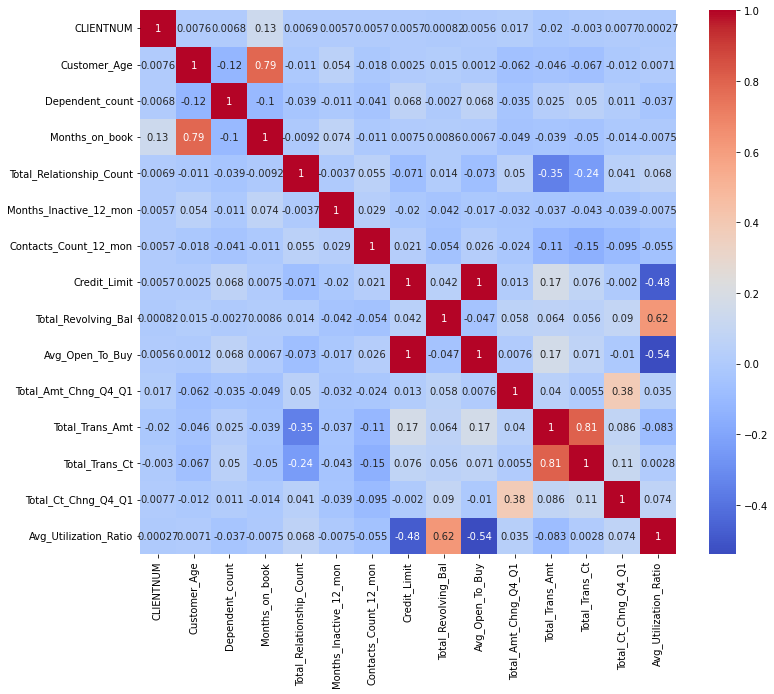

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Categorical Features

In [12]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feature)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [13]:
for feature in cat_feature:
    print(f'{feature} has {len(df[feature].unique())} values')

Attrition_Flag has 2 values
Gender has 2 values
Education_Level has 7 values
Marital_Status has 4 values
Income_Category has 6 values
Card_Category has 4 values


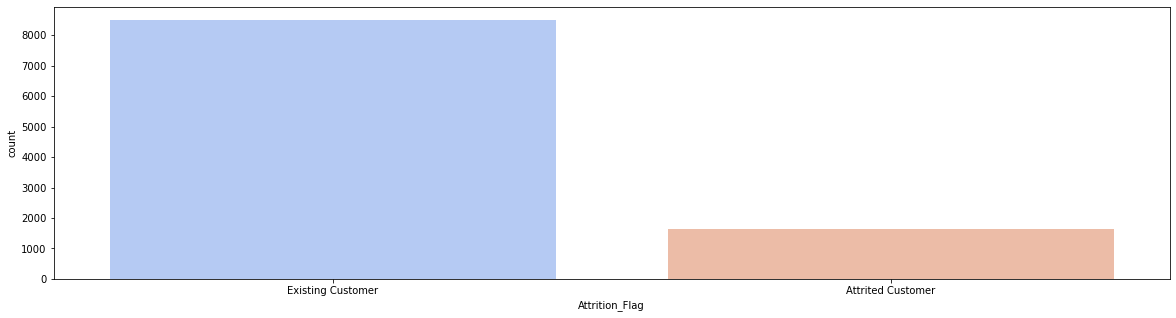

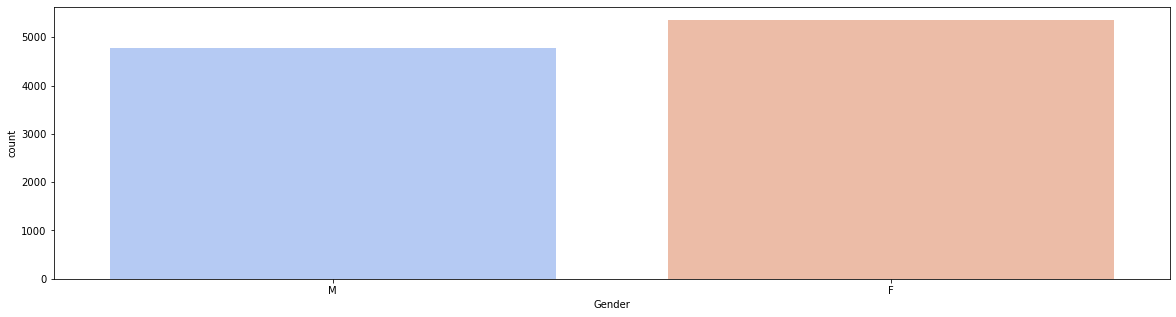

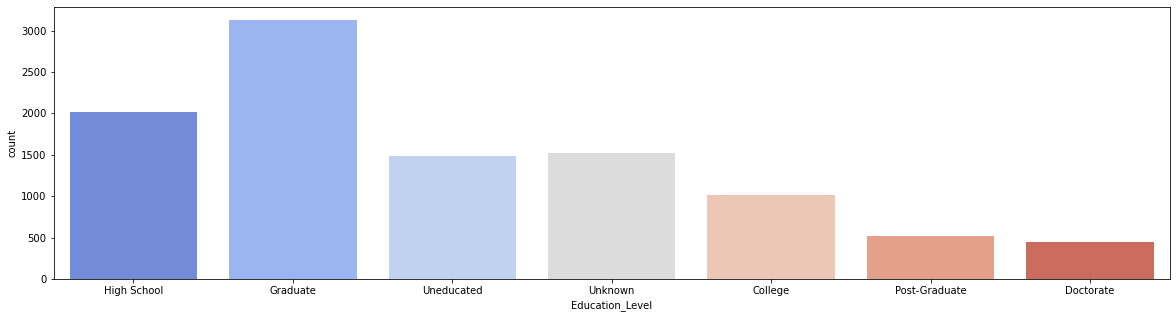

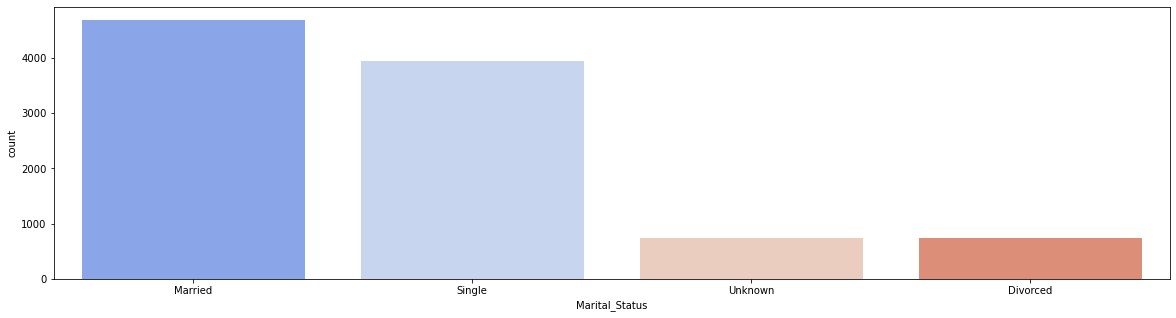

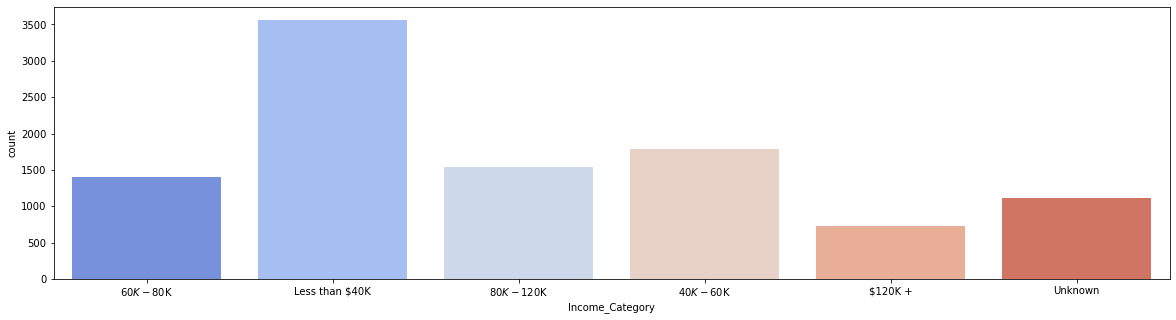

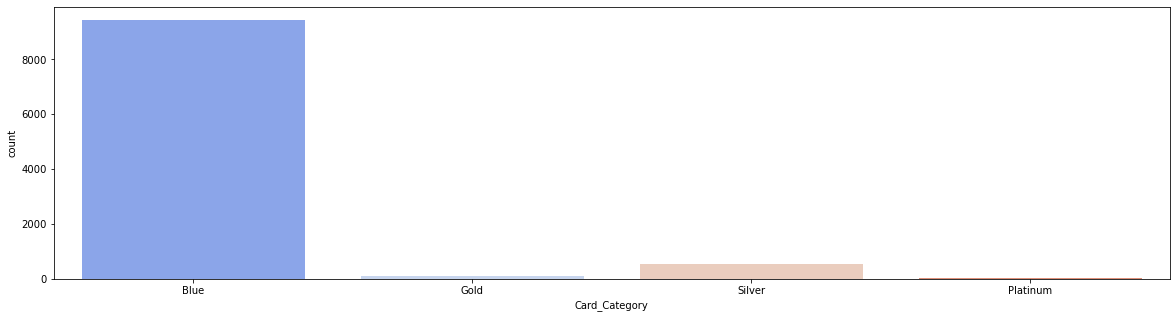

In [14]:
cat_feature1=[feature for feature in cat_feature if len(df[feature].unique())<50]
for feature in cat_feature1 :
    plt.figure(figsize = (20, 5))
    sns.countplot(df[feature],palette="coolwarm")
    plt.show()

### Numerical Features

In [15]:
num_feature=[feature for feature in df.columns if df[feature].dtype =='int64']
print(num_feature)

['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']


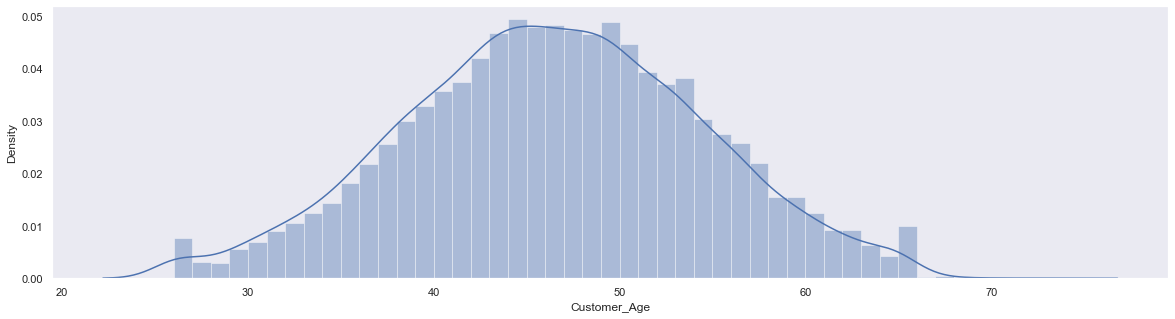

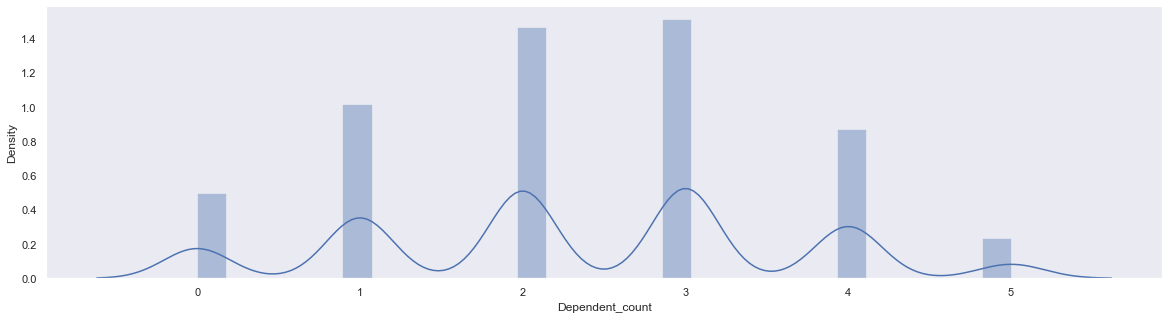

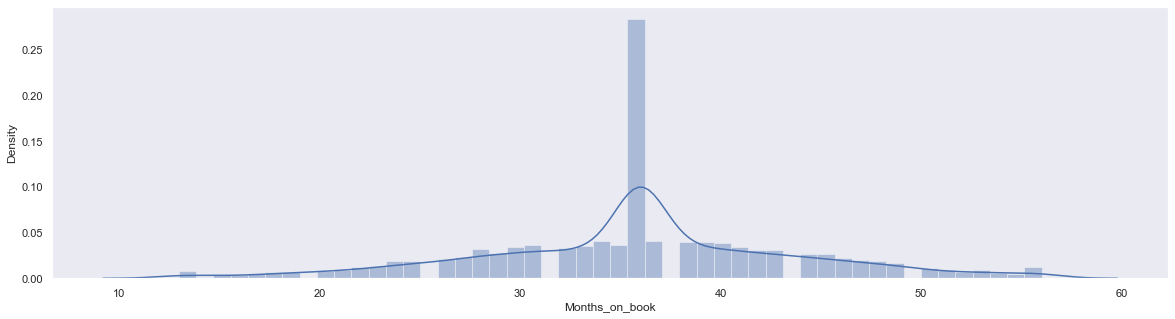

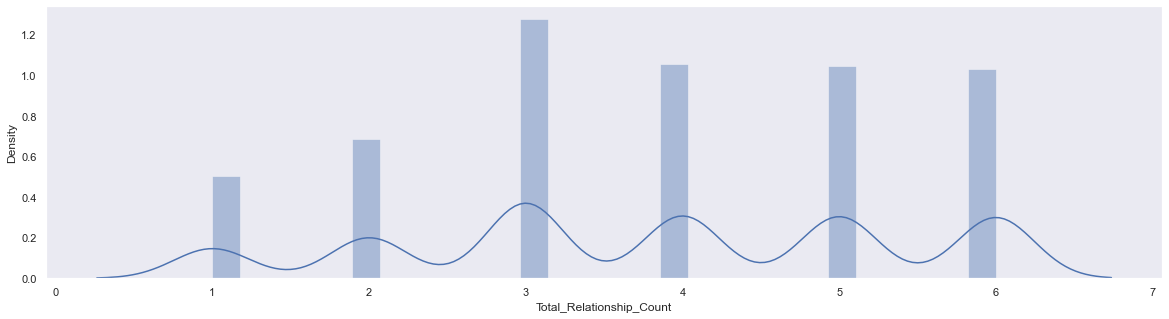

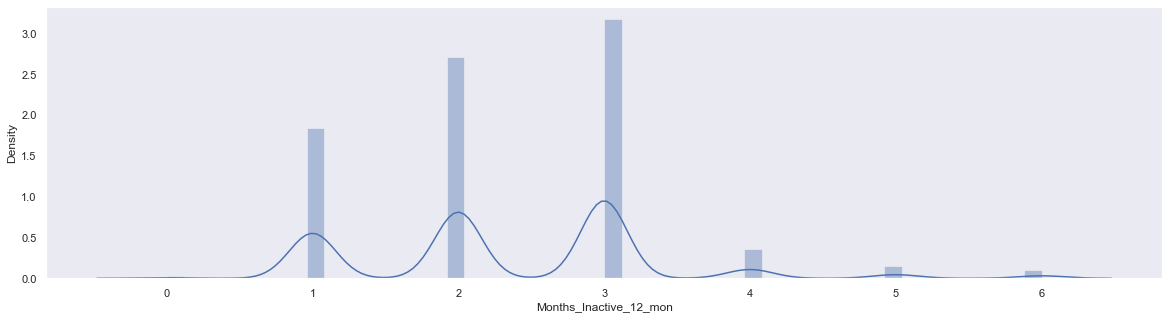

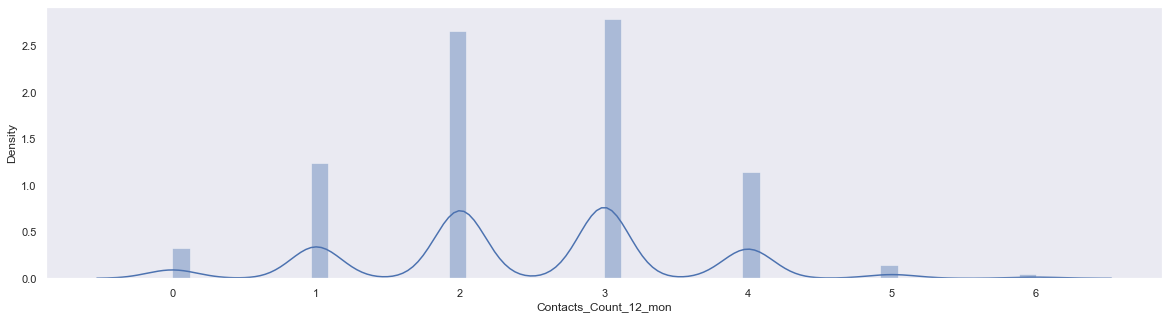

In [16]:
num_feature1=[feature for feature in num_feature if len(df[feature].unique())<50]
for feature in num_feature1 :
    plt.figure(figsize = (20, 5))
    sns.set(style='dark',)
    sns.distplot(df[feature])
    plt.show()

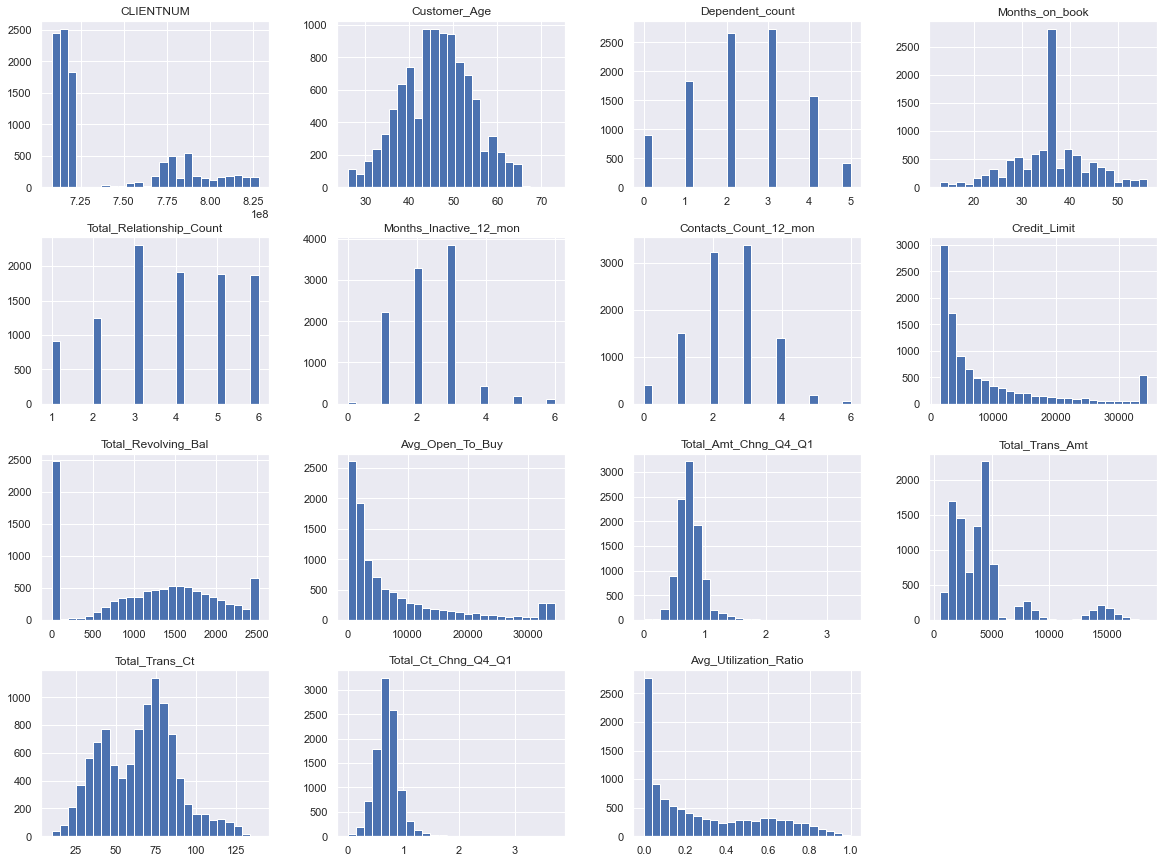

In [17]:
df.hist(bins=25, figsize=(20,15))
plt.show()

### Removing Outliers

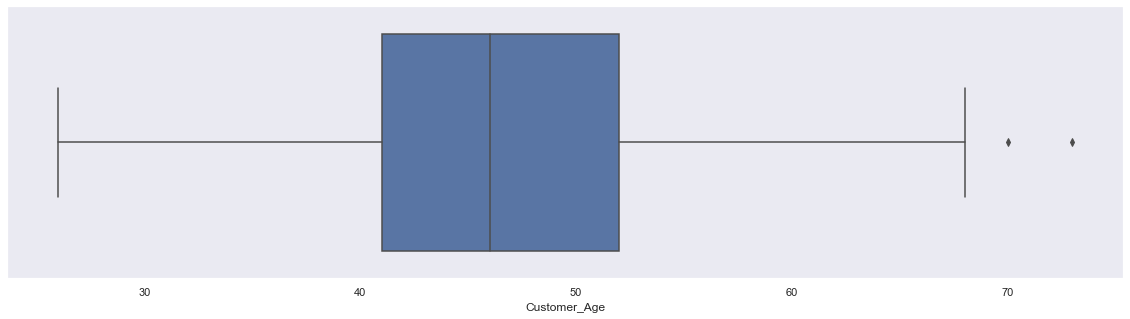

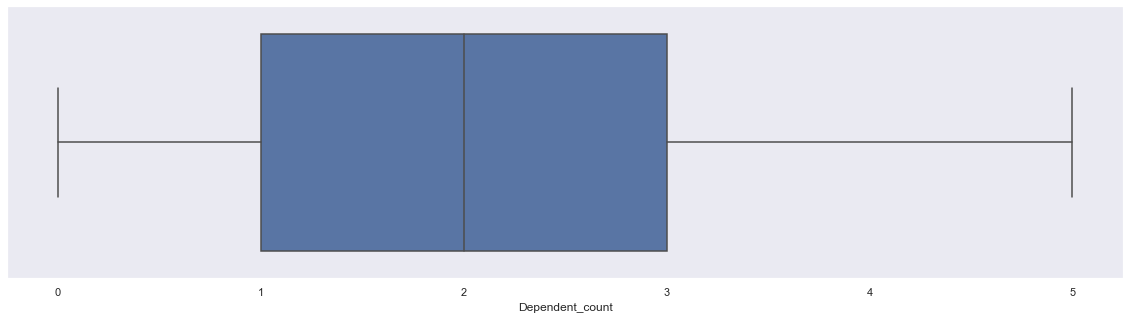

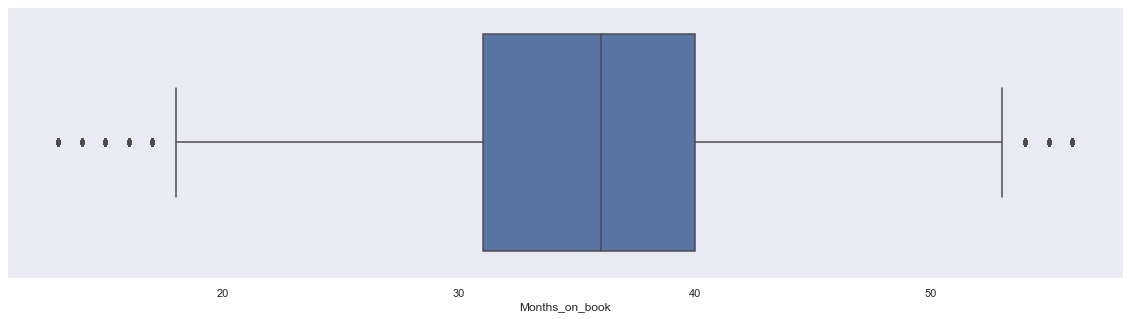

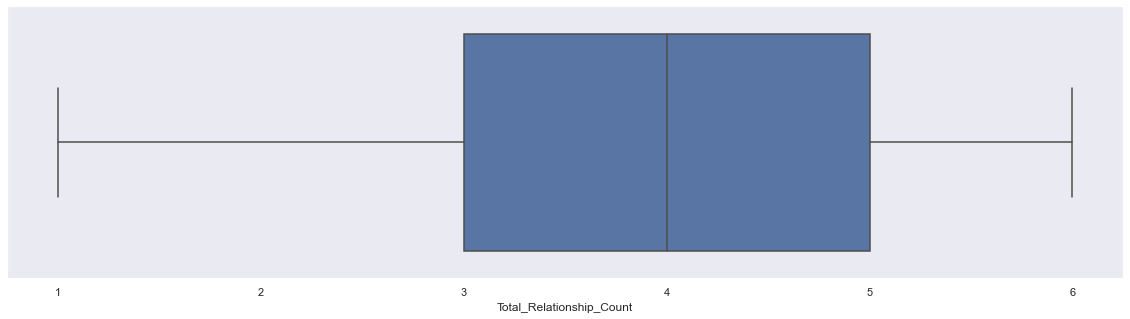

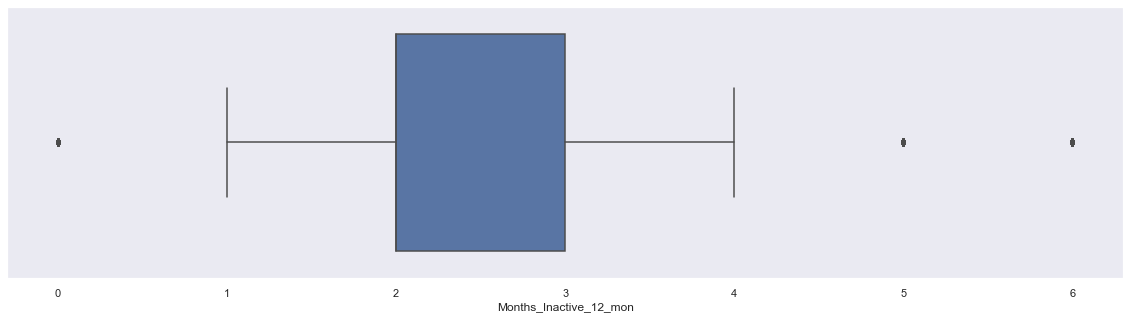

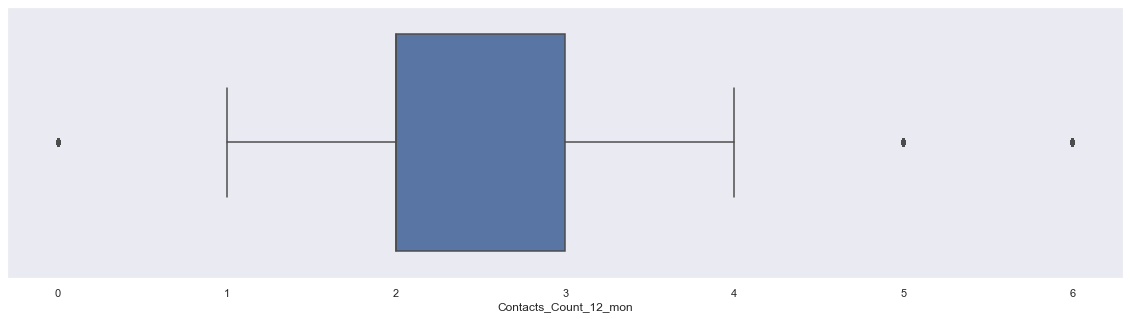

In [18]:
num_feature1=[feature for feature in num_feature if len(df[feature].unique())<50]
for feature in num_feature1 :
    plt.figure(figsize = (20, 5))
    
    sns.boxplot(df[feature])
    plt.show()

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

In [20]:
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

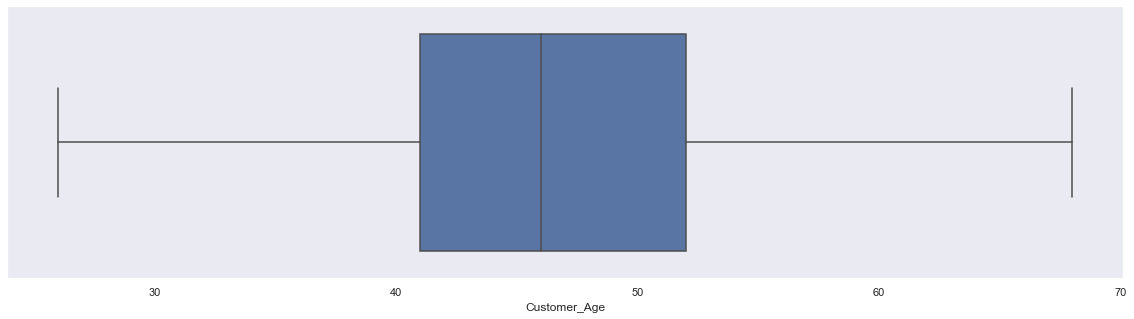

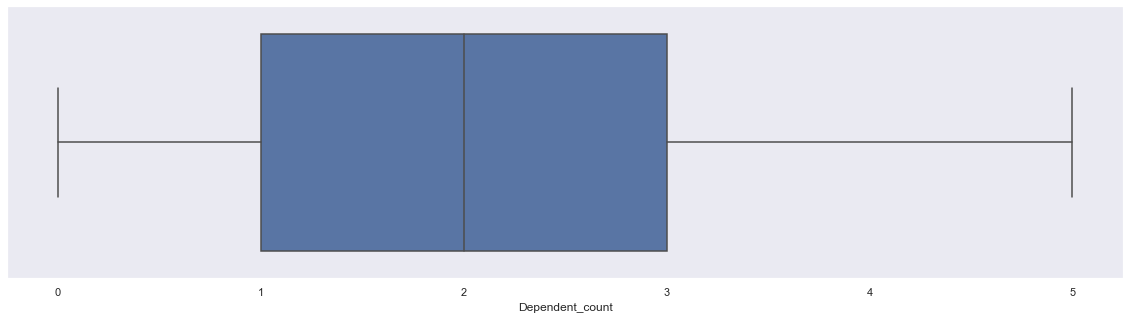

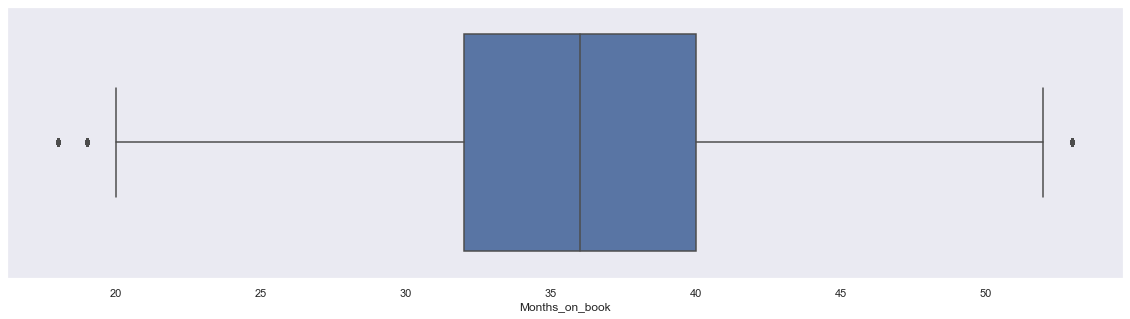

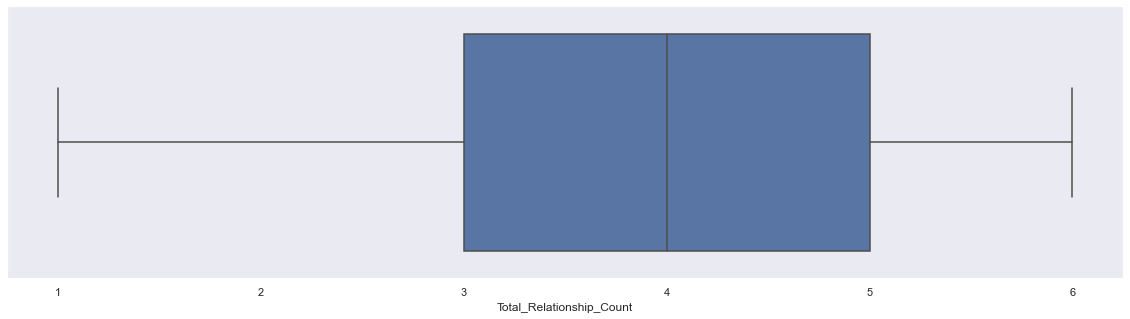

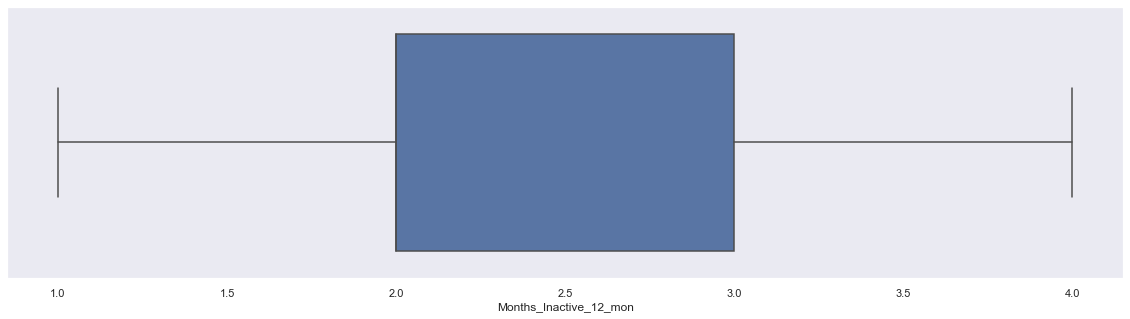

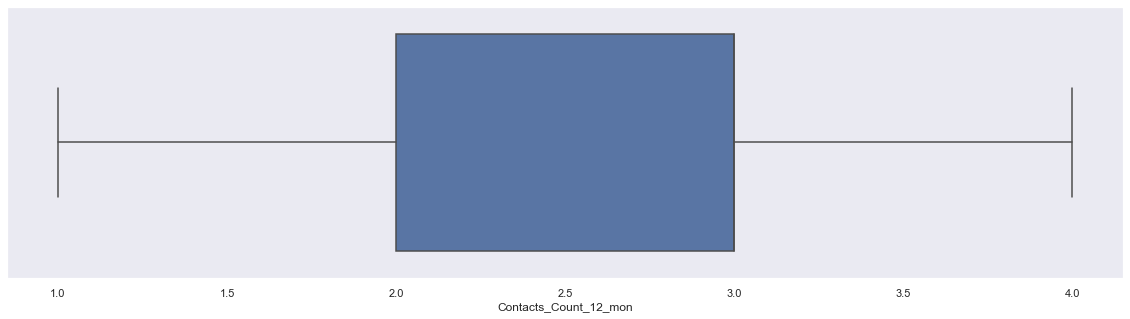

In [21]:
num_feature1=[feature for feature in num_feature if len(df[feature].unique())<50]
for feature in num_feature1 :
    plt.figure(figsize = (20, 5))
    
    sns.boxplot(df[feature])
    plt.show()

In [22]:
df.drop('CLIENTNUM', axis=1, inplace=True)

removed the 'client number' column as it does not provide any information towards the classification problem

In [23]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626


In [24]:
# encoding all of the categorical features using label encoder

from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()


for feature in ['Attrition_Flag','Gender','Education_Level','Marital_Status', 'Income_Category', 'Card_Category']:
    df[feature]=encode.fit_transform(df[feature])

In [196]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080


In [26]:
df.round(decimals = 2).head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.83,1201,42,0.68,0.22
14,1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.19,1570,29,0.61,0.28
19,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.97,1207,21,0.91,0.08


#### **Splitting into Train set and Test set**

In [27]:
x = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0) 

In [29]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (5440, 19)
X_test: (1361, 19)
Y_train: (5440,)
Y_test: (1361,)


In [30]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
x.head(3)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080


In [32]:
y.head(3)

10    1
14    1
19    1
Name: Attrition_Flag, dtype: int32

In [33]:
# building a model 

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

#### First: Decision Tree

In [34]:
tree = DecisionTreeClassifier()

model_parameters = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [2, 4, 8, 10, 16,32],
    'min_samples_split' : [2, 4, 8, 10, 16],
}

# cross validation

grid_model = GridSearchCV(tree, model_parameters, cv = 5)
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, 16, 32],
                         'min_samples_split': [2, 4, 8, 10, 16],
                         'splitter': ['best', 'random']})

In [35]:
print("the best score is ", grid_model.best_score_)
print("the best parameters are ", grid_model.best_params_)

the best score is  0.9422794117647058
the best parameters are  {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 16, 'splitter': 'best'}


I am going to use these parameters for the main decision tree classifier model

In [36]:
tree_model = DecisionTreeClassifier(criterion='gini',
                                   max_depth=8,
                                   min_samples_split=16,
                                   splitter='best',
                                   random_state=0)

tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=0)

In [37]:
tree_predictions = tree_model.predict(x_test)
print('the accuracy score is ', accuracy_score(y_test,tree_predictions))

the accuracy score is  0.9426891991182954


94% accuracy, very good 

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       222
           1       0.96      0.97      0.97      1139

    accuracy                           0.94      1361
   macro avg       0.90      0.88      0.89      1361
weighted avg       0.94      0.94      0.94      1361



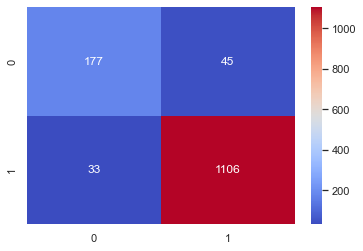

In [38]:
y_pred = tree_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d", cmap='coolwarm')
print(classification_report(y_test, y_pred))

In [39]:
feature_names = x.columns
feature_importance = pd.DataFrame(tree_model.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Total_Trans_Ct,0.355951
Total_Revolving_Bal,0.219188
Total_Trans_Amt,0.182558
Total_Relationship_Count,0.075459
Total_Ct_Chng_Q4_Q1,0.063665
Total_Amt_Chng_Q4_Q1,0.028262
Months_Inactive_12_mon,0.025927
Customer_Age,0.014597
Credit_Limit,0.013934
Avg_Open_To_Buy,0.007765


<Figure size 1008x720 with 0 Axes>

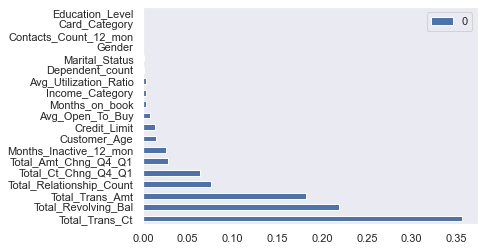

<Figure size 1008x720 with 0 Axes>

In [40]:
feature_importance.plot(kind='barh')
plt.figure(figsize=(14,10))

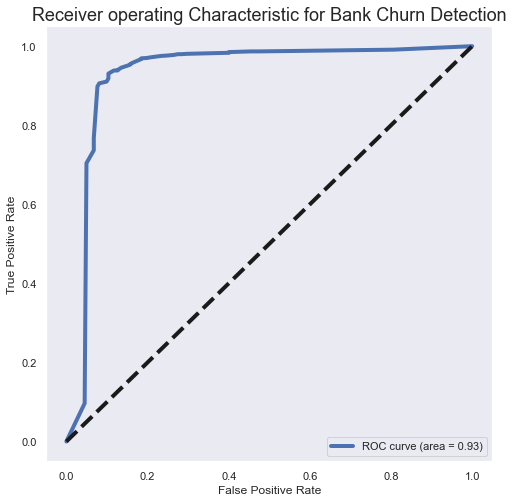

In [41]:
y_pred_proba = tree_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)

# create roc curve
plt.figure(figsize=[8,8])
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating Characteristic for Bank Churn Detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

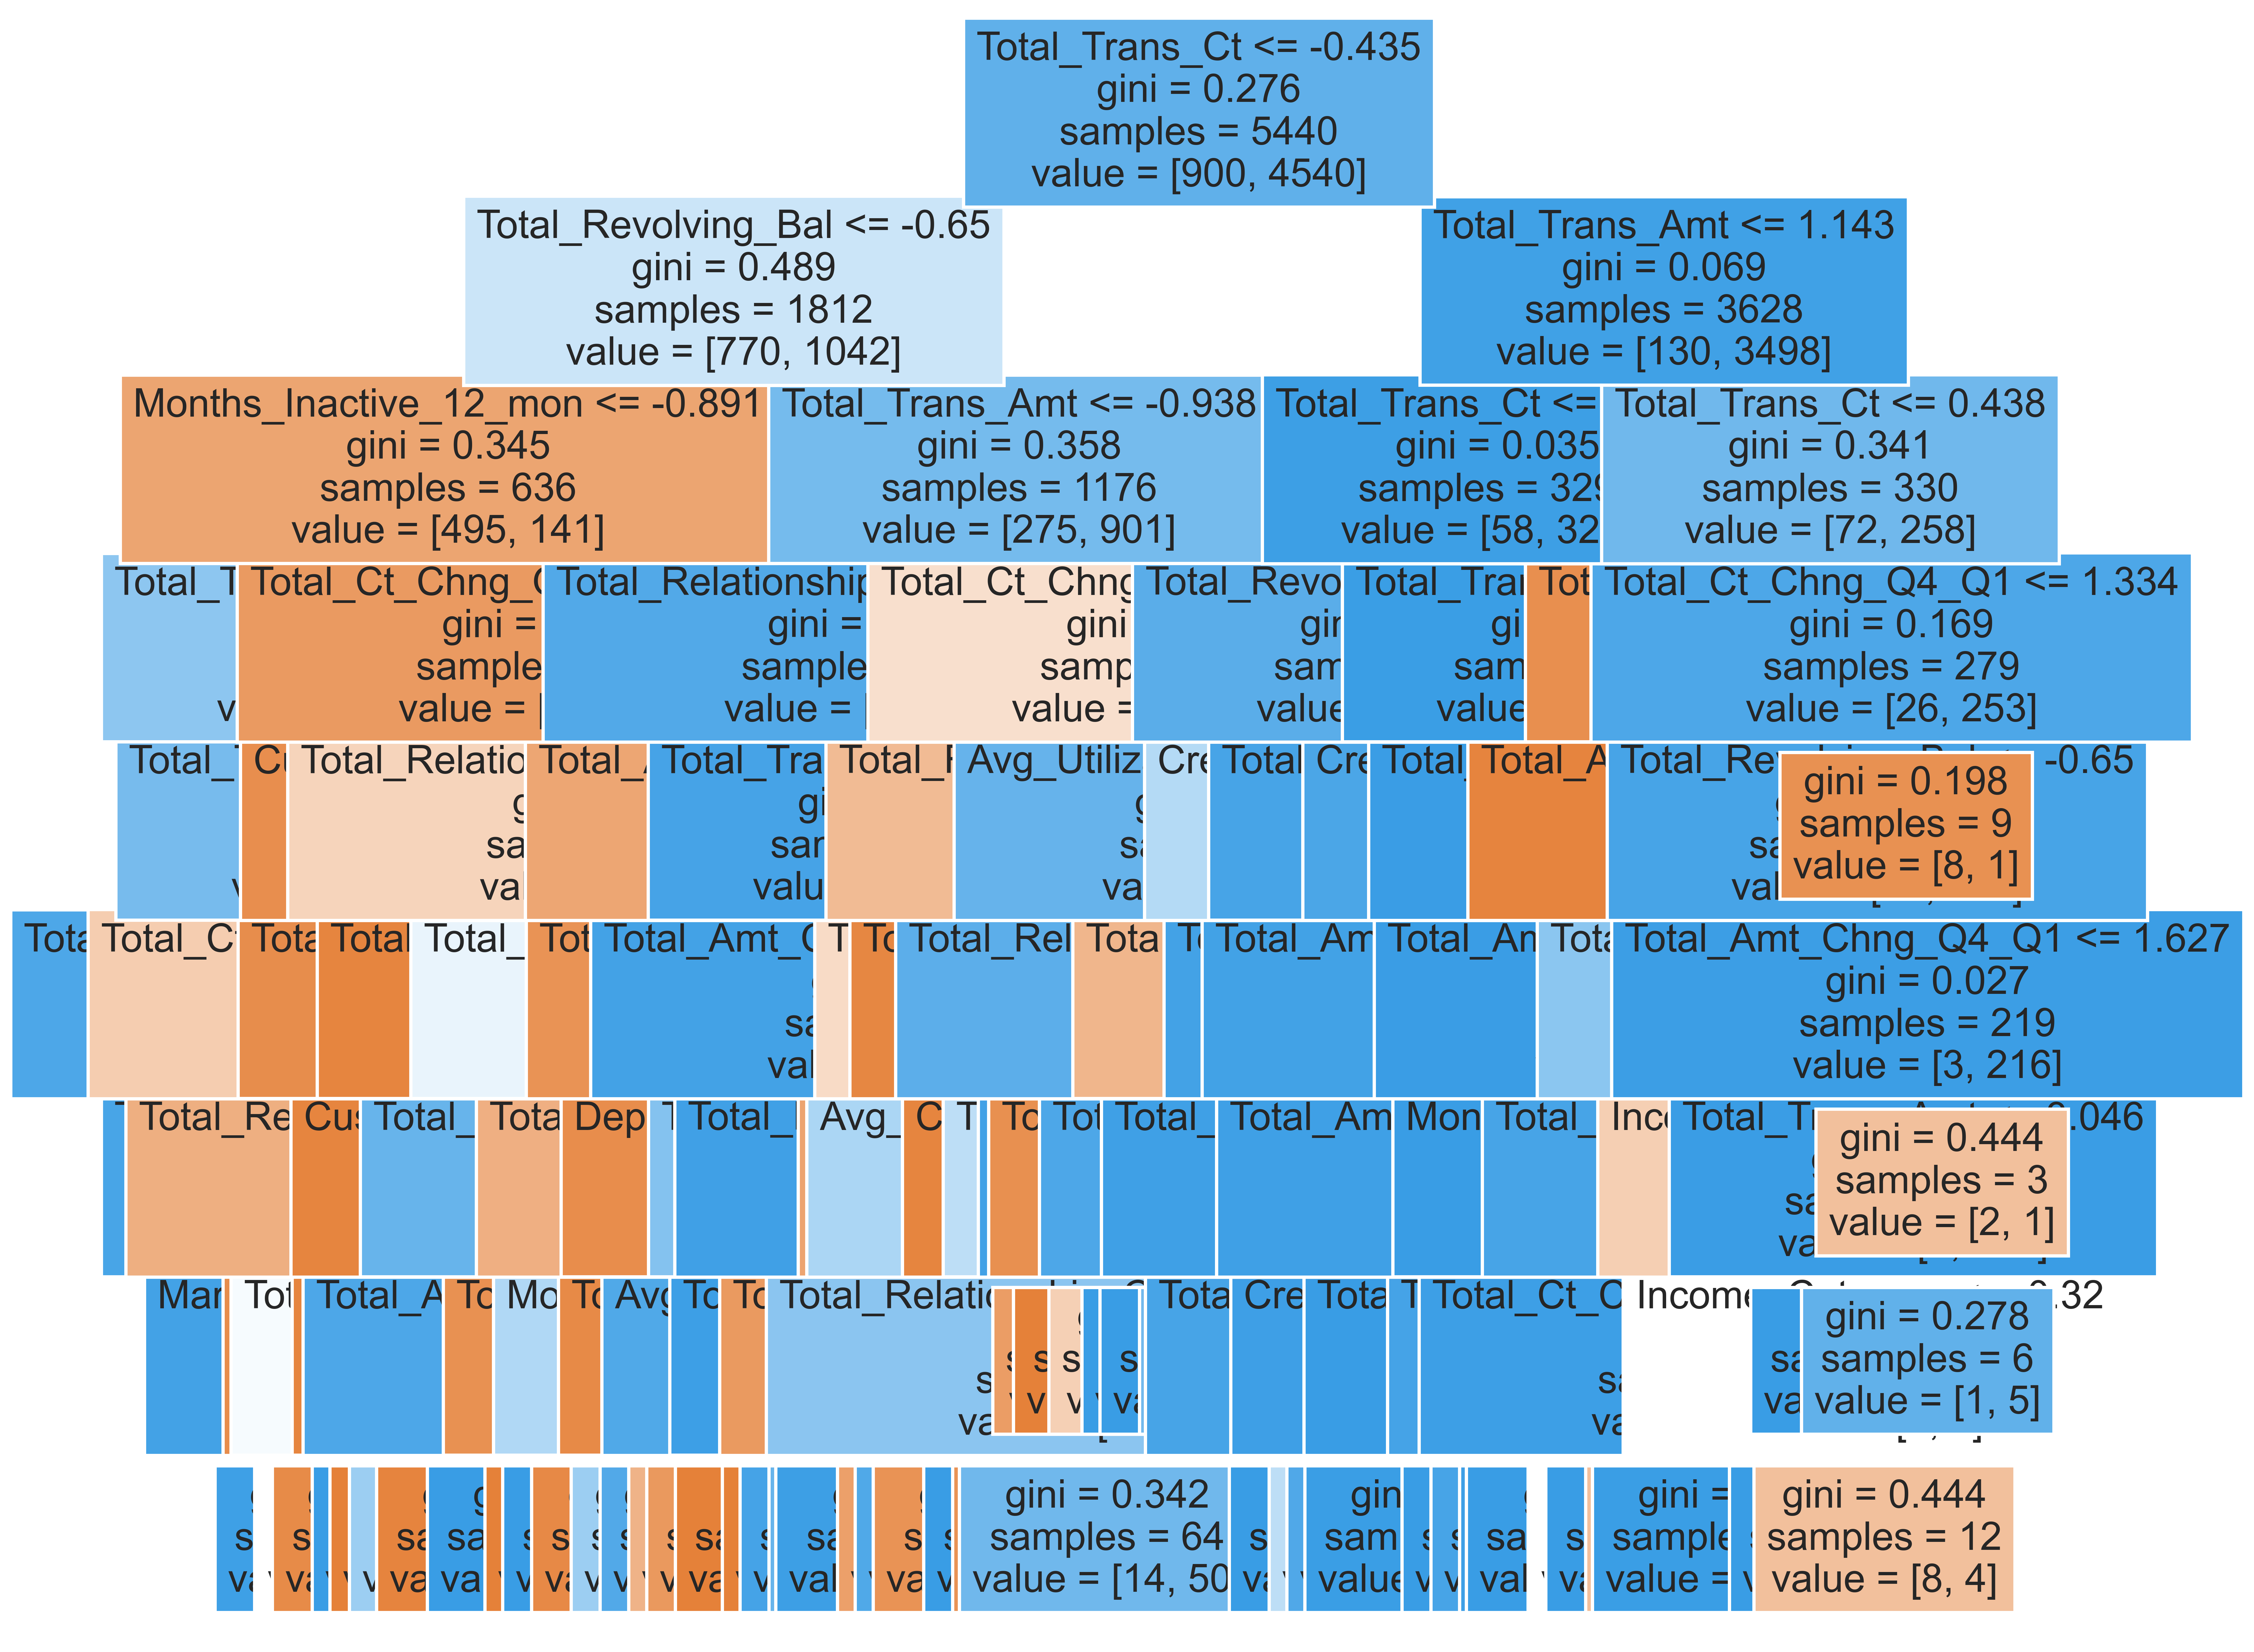

In [45]:
from sklearn import tree

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(x_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (9,9), dpi=800)
tree.plot_tree(tree_model,
                  feature_names = feature_names,
                    filled=True,
                   fontsize=12
                  )
plt.show()

#### Second: Random Forest

In [43]:
random = RandomForestClassifier()

random_parameters = {
    'criterion' : ['gini', 'entropy'],
    "n_estimators" : [5, 10, 50, 100, 250],
    "max_depth" : [2, 4, 8, 16, 32],
    'min_samples_split' : [2, 6, 10]
    }

# cross validation

grid_model = GridSearchCV(random, random_parameters, cv = 5)
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [47]:
print("the best score is ", grid_model.best_score_)
print("the best parameters are ", grid_model.best_params_)

the best score is  0.9602941176470587
the best parameters are  {'criterion': 'gini', 'max_depth': 32, 'min_samples_split': 6, 'n_estimators': 100}


I am going to use these parameters for the randon forest classifier model

In [48]:
random_model = RandomForestClassifier(criterion = 'gini',
                                  max_depth = 16,
                                  min_samples_split = 2,
                                  n_estimators = 250)

random_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=250)

In [49]:
random_predictions = random_model.predict(x_test)
print('the accuracy score is ', accuracy_score(y_test,random_predictions))

the accuracy score is  0.9551800146950772


95% accuracy

              precision    recall  f1-score   support

           0       0.91      0.81      0.85       222
           1       0.96      0.98      0.97      1139

    accuracy                           0.96      1361
   macro avg       0.94      0.90      0.91      1361
weighted avg       0.95      0.96      0.95      1361



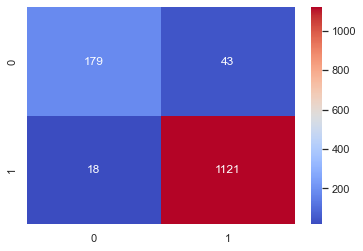

In [50]:
y_pred = random_model.predict(x_test)
y_train_prob = random_model.predict_proba(x_train)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d", cmap='coolwarm')
print(classification_report(y_test, y_pred))

In [51]:
feature_names = x.columns
feature_importance = pd.DataFrame(random_model.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Total_Trans_Amt,0.223124
Total_Trans_Ct,0.187070
Total_Revolving_Bal,0.114086
Total_Ct_Chng_Q4_Q1,0.093630
Total_Relationship_Count,0.062354
Avg_Utilization_Ratio,0.059286
Total_Amt_Chng_Q4_Q1,0.044379
Credit_Limit,0.034888
Avg_Open_To_Buy,0.032532
Customer_Age,0.031032


<AxesSubplot:>

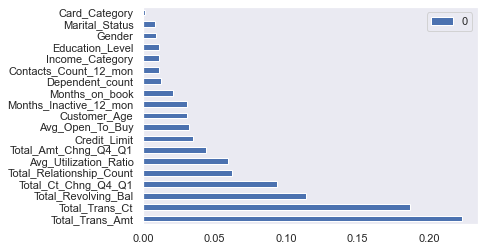

In [52]:
feature_importance.plot(kind='barh')

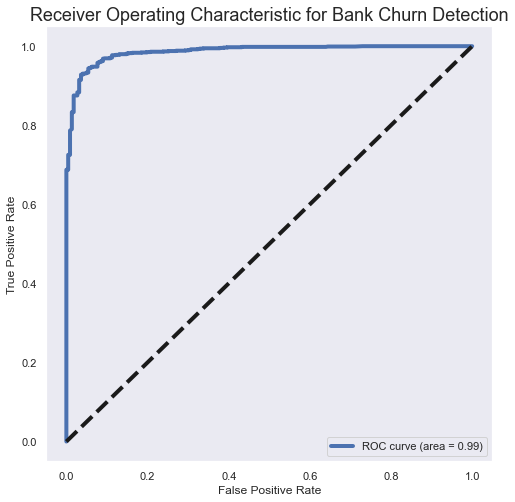

In [53]:
y_pred_proba = random_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)

# create roc curve
plt.figure(figsize=[8,8])
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic for Bank Churn Detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Third: Support Vector Machine

In [54]:
svm = SVC()
svm_parameters = {
    'C' : [0.5, 0.75, 1, 2, 3],
    'kernel' : ['linear', 'rbf', 'poly'],
    'gamma' : ["auto", 0.001, 0.01, 0.1, 1],
    'decision_function_shape' : ["ovo","ovr"],
#     'probability' : True
}

grid_svm = GridSearchCV(svm, svm_parameters, cv = 5)
grid_svm.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 0.75, 1, 2, 3],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [55]:
print("Best score: ", grid_svm.best_score_)
print("Best parameters: ", grid_svm.best_params_)

Best score:  0.9358455882352942
Best parameters:  {'C': 3, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}


these are the best parameters given after 5-fold cross validation

In [56]:
svm_model = SVC(C = 3, decision_function_shape = 'ovo', gamma = 'auto', kernel = 'rbf', random_state=0)

svm_model.fit(x_train,y_train)

SVC(C=3, decision_function_shape='ovo', gamma='auto', random_state=0)

In [57]:
svm_predictions = svm_model.predict(x_test)
print('the accuracy score is ', accuracy_score(y_test, svm_predictions))

the accuracy score is  0.9301983835415136


              precision    recall  f1-score   support

           0       0.82      0.73      0.77       222
           1       0.95      0.97      0.96      1139

    accuracy                           0.93      1361
   macro avg       0.88      0.85      0.87      1361
weighted avg       0.93      0.93      0.93      1361



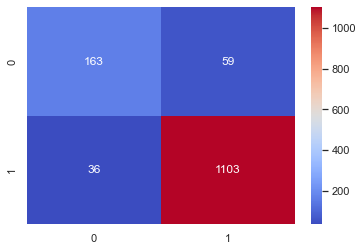

In [58]:
y_pred = svm_model.predict(x_test)

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d", cmap='coolwarm')
print(classification_report(y_test, y_pred))

#### Fourth: K Nearest Neighbour

In [59]:
neigh_model = KNeighborsClassifier()
neigh_parameters = {'n_neighbors': (2, 5, 10,30),
              'algorithm': ('auto','ball_tree', 'kd_tree'),
              'weights': ('uniform', 'distance'), 'leaf_size':(10,30,50)
             }

grid_neigh = GridSearchCV(neigh_model, neigh_parameters, cv = 5)
grid_neigh.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree'),
                         'leaf_size': (10, 30, 50),
                         'n_neighbors': (2, 5, 10, 30),
                         'weights': ('uniform', 'distance')})

In [60]:
print("Best score: ", grid_neigh.best_score_)
print("Best parameters: ", grid_neigh.best_params_)

Best score:  0.9117647058823529
Best parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'uniform'}


im going to use these parameters for the main Nearest Neighbour Classifier model

In [61]:
knn_model = KNeighborsClassifier(algorithm ='auto',
                                     leaf_size =10,
                                     n_neighbors =10, 
                                     weights ='uniform')

knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10)

In [62]:
knn_predictions = knn_model.predict(x_test)
print('the accuracy score is ', accuracy_score(y_test, knn_predictions))

the accuracy score is  0.9162380602498164


Nearest neighbour model gave an accuracy of 91%

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       222
           1       0.95      0.97      0.96      1139

    accuracy                           0.93      1361
   macro avg       0.88      0.85      0.87      1361
weighted avg       0.93      0.93      0.93      1361



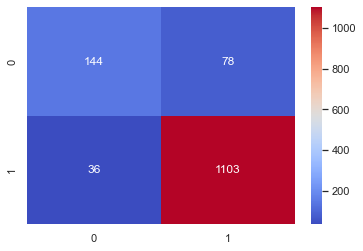

In [63]:
y_predict = knn_model.predict(x_test)

# confusion Matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot=True,fmt="d", cmap='coolwarm')
print(classification_report(y_test, y_pred))

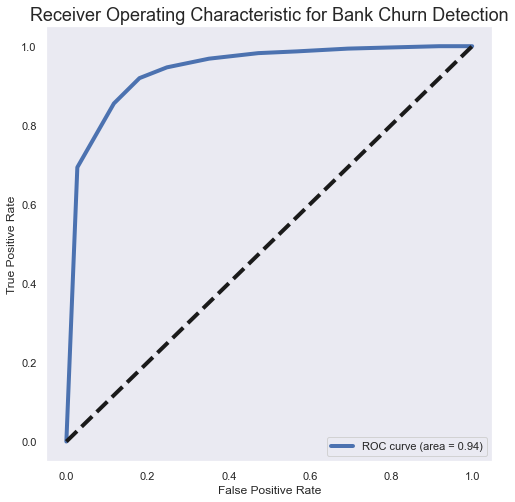

In [64]:
y_pred_proba = knn_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)

# create roc curve
plt.figure(figsize=[8,8])
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic for Bank Churn Detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [65]:
#  DECISION TREE MODEL
y_pred_tree = tree_model.predict(x_test)

#  RANDOM FOREST MODEL
y_pred_random = random_model.predict(x_test)

#  SUPPORT VECTOR MODEL
y_pred_svm = svm_model.predict(x_test)

#  KNN MODEL

y_pred_knn = knn_model.predict(x_test)

predictions = {
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_random,
    "Support Vector": y_pred_svm,
    "KNN": y_pred_knn
}

In [66]:
def get_scores(predictions, y_test):
    model_score = {}
    for name, value in predictions.items():
        model_score[name] = f1_score(y_true=y_test, y_pred=value)
    return model_score

In [67]:
summary = get_scores(predictions, y_test)
summary = pd.DataFrame([summary])
summary = summary.melt(var_name="Models", value_name="f1 Scores")

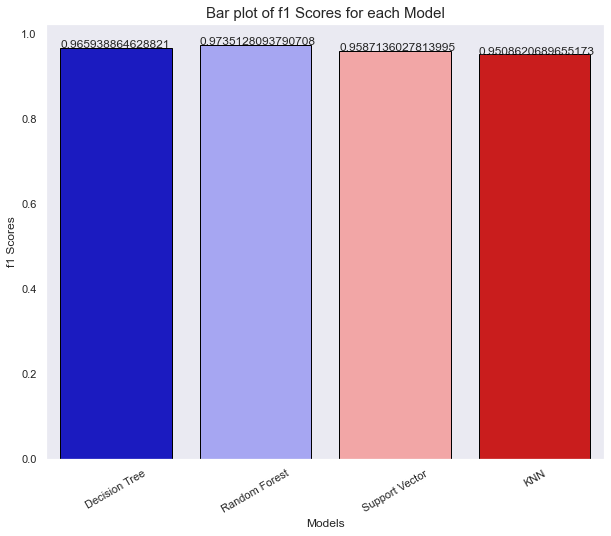

In [68]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=summary, x=summary['Models'], y=summary["f1 Scores"], edgecolor='black', ci='sd', palette='seismic')


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1, p.get_height()*1)),
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='center')
    plt.title('Bar plot of f1 Scores for each Model', fontsize=15)       

